# Table of Contents
- [Import Library](#import-library)
- [Read In CSV](#read-in-csv)

## Import Library

In [38]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

## Read In CSV

In [28]:
eth = pd.read_csv('./ohlcv_daily.csv')

In [29]:
eth.set_index('trading_point', inplace=True)

In [30]:
eth.index

Index(['2017-11-09', '2017-11-10', '2017-11-11', '2017-11-12', '2017-11-13',
       '2017-11-14', '2017-11-15', '2017-11-16', '2017-11-17', '2017-11-18',
       ...
       '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06',
       '2024-01-07', '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11'],
      dtype='object', name='trading_point', length=2255)

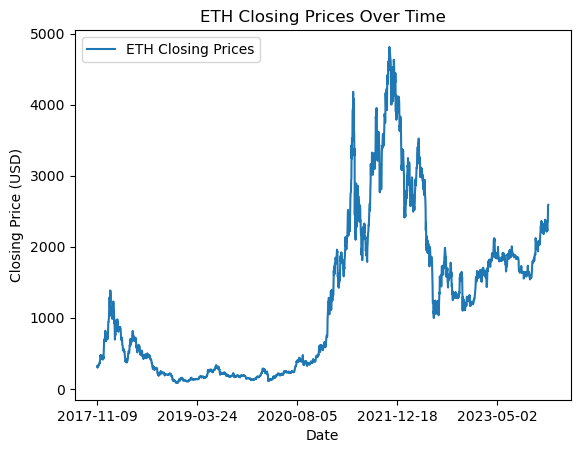

In [31]:
eth.plot.line(y='close', use_index=True, style='-', label='ETH Closing Prices')
plt.title('ETH Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)');

In [32]:
# Set up our target. This is what we are going to be predicting using machine learning. This target is going to be--will the price go up or down tomorrow?
# Some people like to predict the absolute price but the problem with that is your model can be extremely accurate at predicting absolute price, but you can still lose a ton of money, you don't care about
## getting accurate on the absolute price, you care more about the directionality (up or down)
# On days ETH goes up, can we actually predict that it will go up so if we buy it the price will go up.

In [33]:
# we took the close column, then we shifted all the prices back one day, so we now have a column that show's tomorrows price

In [34]:
eth['tomorrow'] = eth['close'].shift(-1)
eth

,open,high,low,close,volume,tomorrow
trading_point,,,,,,
2017-11-09,322.15,331.70,317.29,321.32,1.311815e+04,298.66
2017-11-10,321.32,325.61,291.00,298.66,3.441165e+04,315.76
2017-11-11,298.66,322.19,298.00,315.76,2.383674e+04,306.10
2017-11-12,315.76,318.98,300.11,306.10,4.820080e+04,316.14
2017-11-13,306.10,320.69,305.91,316.14,3.661350e+04,335.54
...,...,...,...,...,...,...
2024-01-07,2241.70,2258.00,2207.30,2222.80,1.079937e+07,2332.70
2024-01-08,2222.70,2360.50,2168.00,2332.70,1.742889e+07,2345.10
2024-01-09,2333.50,2371.80,2228.70,2345.10,1.595371e+07,2584.80


In [35]:
eth['target'] = (eth['tomorrow'] > eth['close']).astype(int)
eth

,open,high,low,close,volume,tomorrow,target
trading_point,,,,,,,
2017-11-09,322.15,331.70,317.29,321.32,1.311815e+04,298.66,0
2017-11-10,321.32,325.61,291.00,298.66,3.441165e+04,315.76,1
2017-11-11,298.66,322.19,298.00,315.76,2.383674e+04,306.10,0
2017-11-12,315.76,318.98,300.11,306.10,4.820080e+04,316.14,1
2017-11-13,306.10,320.69,305.91,316.14,3.661350e+04,335.54,1
...,...,...,...,...,...,...,...
2024-01-07,2241.70,2258.00,2207.30,2222.80,1.079937e+07,2332.70,1
2024-01-08,2222.70,2360.50,2168.00,2332.70,1.742889e+07,2345.10,1
2024-01-09,2333.50,2371.80,2228.70,2345.10,1.595371e+07,2584.80,1


In [36]:
# no need to remove any data because 2017 is far enough

In [ ]:
# now we are training an intitial machine learning model
# we are going to use RandomForestClassifier first. 
# Random Forests work by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees
# Resistant to overfitting--can overfit but it's hard for them to do so
# Runs quickly and can pick up nonlinear tendencies in the data
## Example-open price is not linearly correlated with the target

In [ ]:
# with time series data, you can't use cross-validation (you can) but your results will look amazing when you're training and horrible in the real world
## if you use cross-validation to split up your training/test set taht doesn't take the time series nature of the data into account, you'll be using
## future data to predict the past which you can't do in the real world which presents leakage

In [57]:
# Instantiate data
rf = RandomForestClassifier(
    n_estimators=600, # number of individual decision trees we want to train, higher it is, higher the accuracy--up to a limit
    min_samples_split=50, # protect against overfitting--decision trees have a tendency to overfit if they build the tree too deeply
    random_state=1, # if we run the same number twice, the random numbers that are generated will be in a predictable sequence each time
)

train = eth.iloc[:-100]
test = eth.iloc[-100:]

predictors = ['close', 'volume', 'open', 'high', 'low']
rf.fit(train[predictors], train['target'])

RandomForestClassifier(min_samples_split=50, n_estimators=600, random_state=1)

In [58]:
# we will use precision score to determine how accurate our model is. all the precision score is saying is when we said the market will go up (target = 1)
## did it actually go up. really good accuracy metric for this case, since we assume in this case we want to purchase ETH, when we buy we want to hold, then sell

In [59]:
preds = rf.predict(test[predictors])
preds = pd.Series(preds, index=test.index)

In [60]:
preds

trading_point
2023-10-04    0
2023-10-05    0
2023-10-06    0
2023-10-07    0
2023-10-08    0
             ..
2024-01-07    0
2024-01-08    1
2024-01-09    0
2024-01-10    1
2024-01-11    0
Length: 100, dtype: int32

In [61]:
precision_score(test['target'], preds)

0.5405405405405406

In [62]:
combined = pd.concat([test['target'], preds], axis=1)
combined

,target,0
trading_point,,
2023-10-04,0,0
2023-10-05,1,0
2023-10-06,0,0
2023-10-07,0,0
2023-10-08,0,0
...,...,...
2024-01-07,1,0
2024-01-08,1,1
2024-01-09,1,0


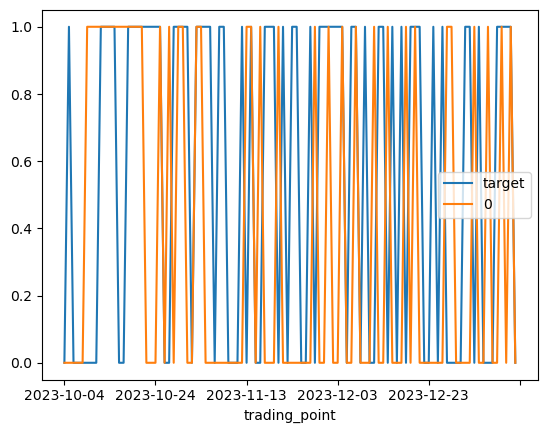

In [64]:
combined.plot();

In [ ]:
# 0 is our predictions and target is what actually happened

In [ ]:
# building a backtesting system. we need a more robust way to test our algorithm. currently we are only testing against the last hundred days, we need to test across years of data
# backtesting 

In [68]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='predictions')
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

In [74]:
def backtest(data, model, predictors, start=2100, step=200):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [75]:
predictions = backtest(eth, rf, predictors)

In [76]:
predictions['predictions'].value_counts()

0    114
1     41
Name: predictions, dtype: int64

In [77]:
precision_score(predictions['target'], predictions['predictions'])
# we were about 54% accurate for 155 days but that good or not?

0.5365853658536586

In [79]:
predictions['target'].value_counts() / predictions.shape[0]
# as a benchmark we can look at a percentage of days where the market actually went up

1    0.529032
0    0.470968
Name: target, dtype: float64

In [80]:
# we are going to predict a variety of rolling averages

In [84]:
horizons = [2,5,60,250,1460] # rolling means - 2 days - 4 years
new_predictors = []

for horizon in horizons:
    rolling_averages = eth.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    eth[ratio_column] = eth['close'] / rolling_averages['close']
    
    trend_column = f"trend_{horizon}"
    eth[trend_column] = eth.shift(1).rolling(horizon).sum()['target']
    
    new_predictors += [ratio_column, trend_column]

In [85]:
eth

,open,high,low,close,volume,tomorrow,target,ratio_column,trend_column,close_ratio_2,trend_2,close_ratio_5,trend_5,close_ratio_60,trend_60,close_ratio_250,trend_250,close_ratio_1460,trend_1460
trading_point,,,,,,,,,,,,,,,,,,,
2017-11-09,322.15,331.70,317.29,321.32,1.311815e+04,298.66,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-10,321.32,325.61,291.00,298.66,3.441165e+04,315.76,1,NaN,NaN,0.963450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-11,298.66,322.19,298.00,315.76,2.383674e+04,306.10,0,NaN,NaN,1.027831,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-12,315.76,318.98,300.11,306.10,4.820080e+04,316.14,1,NaN,NaN,0.984466,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,306.10,320.69,305.91,316.14,3.661350e+04,335.54,1,NaN,NaN,1.016135,1.0,1.014583,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-07,2241.70,2258.00,2207.30,2222.80,1.079937e+07,2332.70,1,1.286728,761.0,0.995811,0.0,0.991065,1.0,1.019580,31.0,1.189802,123.0,1.286728,761.0
2024-01-08,2222.70,2360.50,2168.00,2332.70,1.742889e+07,2345.10,1,1.349173,762.0,1.024125,1.0,1.028890,2.0,1.068264,31.0,1.247487,123.0,1.349173,762.0
2024-01-09,2333.50,2371.80,2228.70,2345.10,1.595371e+07,2584.80,1,1.355163,762.0,1.002651,2.0,1.027516,2.0,1.071766,32.0,1.252867,124.0,1.355163,762.0


In [ ]:
# lots of NaN. When pandas cant find enough days or rows to compute rolling average, it will provide NaN
# trend, we can't include current day. it is looking for 2 days, you'd be including todays target which provides leakage and looks amazing but doesn't work in real world

In [86]:
eth = eth.dropna()

In [94]:
eth

,open,high,low,close,volume,tomorrow,target,ratio_column,trend_column,close_ratio_2,trend_2,close_ratio_5,trend_5,close_ratio_60,trend_60,close_ratio_250,trend_250,close_ratio_1460,trend_1460
trading_point,,,,,,,,,,,,,,,,,,,
2021-11-08,4617.62,4824.99,4617.56,4811.59,9.050029e+07,4733.09,0,5.987529,757.0,1.020557,2.0,1.047355,3.0,1.304478,34.0,1.712565,142.0,5.987529,757.0
2021-11-09,4806.79,4842.65,4712.40,4733.09,9.091089e+07,4634.19,0,5.867667,757.0,0.991776,1.0,1.021600,3.0,1.274424,34.0,1.676997,142.0,5.867667,757.0
2021-11-10,4733.09,4868.79,4452.86,4634.19,1.214426e+08,4723.51,1,5.724070,756.0,0.989442,0.0,0.993640,3.0,1.240185,33.0,1.634757,142.0,5.724070,756.0
2021-11-11,4631.42,4783.27,4580.00,4723.51,8.764914e+07,4673.95,0,5.812673,757.0,1.009545,1.0,1.004142,3.0,1.256704,33.0,1.659073,142.0,5.812673,757.0
2021-11-12,4719.61,4810.93,4510.01,4673.95,6.646582e+07,4646.02,0,5.730637,756.0,0.994726,1.0,0.991238,2.0,1.235888,33.0,1.634897,141.0,5.730637,756.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-06,2270.00,2272.00,2217.00,2241.50,8.636211e+06,2222.80,0,1.298626,761.0,0.993815,0.0,0.987628,2.0,1.030786,32.0,1.200717,124.0,1.298626,761.0
2024-01-07,2241.70,2258.00,2207.30,2222.80,1.079937e+07,2332.70,1,1.286728,761.0,0.995811,0.0,0.991065,1.0,1.019580,31.0,1.189802,123.0,1.286728,761.0
2024-01-08,2222.70,2360.50,2168.00,2332.70,1.742889e+07,2345.10,1,1.349173,762.0,1.024125,1.0,1.028890,2.0,1.068264,31.0,1.247487,123.0,1.349173,762.0


In [177]:
model = RandomForestClassifier(
    n_estimators=400,
    min_samples_split=100,
    random_state=1
)

In [178]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict_proba(test[predictors])[:,1] # returns a probability instead of just a 1 or 0
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='predictions')
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

In [179]:
def backtest(data, model, predictors, start=650, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [180]:
predictions = backtest(eth, model, new_predictors) # no longer using ohlcv since they are absolute numbers, not super informative to model. ratios > abs values

In [181]:
predictions['predictions'].value_counts()

0.0    125
1.0     19
Name: predictions, dtype: int64

In [182]:
# way fewer predictions because we are asking the model to be more confident in its predictions before it predicted the price would go up
# buying in fewer days but hopefully we are more accurate

In [183]:
precision_score(predictions['target'], predictions['predictions'])

0.5789473684210527

In [ ]:
# not bad since we have data to work with. Both of our models beat baseline but better than no rolling averages and trends

In [ ]:
# we had eth data that was cleaned
# we visualized data
# set up ml target
# trained initial model
# evaluated error and backtested 
# improved with extra predictor columns
# continue extending:
## nn